In [58]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import yaml
import getpass
import os
import google.generativeai as genai
from IPython.display import display, Markdown
from lorem_text import lorem

Informe abaixo a sua key para a API do Gemini:

In [10]:
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Enter your Google AI API key: ')

In [11]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

### Exercício 7: Resumo de Notícia Utilizando Exemplos em Prompts

In [8]:
def summarize_news(text: str) -> str:
    '''
    Summarizes a given news article text using a generative AI model. 
    Display the summarized text in markdown.
    Args:
        text (str): The news article text to be summarized.
    '''
    model = genai.GenerativeModel('gemini-1.5-flash')

    prompt = f'''
You are a journalist for a large broadcaster. Your function is to summarize news articles. Given the {text}, you should summarize it by following the example.
###
EXAMPLE
Summary: Dogs respond better to positive reinforcement than to punishment when trained. MIT scientists discovered that rewarding dogs for good behavior is 80%
more effective than punishing them when they don't behave well.
Subject: Science
'''
    response = model.generate_content(prompt.format(text))

    response = response.text.strip().replace('\n', ' ').replace('###', '')

    markdown_output = f'''
#### News Summary

{response}
'''
    display(Markdown(markdown_output))

Texto da notícia a ser resumida

In [9]:
text = '''
The European Union has fined Meta Platforms €798 million ($840 million) over what it called abusive practices benefiting Facebook Marketplace.
“The European Commission has fined Meta … for breaching EU antitrust rules by tying its online classified ads service Facebook Marketplace to
its personal social network Facebook and by imposing unfair trading conditions on other online classified ads service providers,” the EUs 
executive arm said in a statement. Meta (META) said it will appeal the decision, but in the meantime, it will comply and will work quickly
and constructively to launch a solution that addresses the points raised. The move by the European Commission comes two years after it accused
the US tech giant of giving its classified ads service Facebook Marketplace an unfair advantage by bundling the two services together. The European
Union opened formal proceedings into possible anticompetitive conduct of Facebook in June 2021, and in December 2022 raised concerns that Meta
ties its dominant social network Facebook to its online classified ad services. Facebook launched Marketplace in 2016 and expanded into several
European countries a year later. The EU decision argues that Meta imposes Facebook Marketplace on people who use Facebook in an illegal “tie” but Meta
said that argument ignores the fact that Facebook users can choose whether to engage with Marketplace, and many do not. Meta said the European
Commission claimed that Marketplace had the potential to hinder the growth of large incumbent online marketplaces in the EU but could not find any evidence
of harm to competitors. Companies risk fines of as much as 10 percent of their global turnover for EU antitrust violations.
'''

In [147]:
summarize_news(text)


#### News Summary

 Summary: The European Union fined Meta Platforms €798 million ($840 million) for anti-competitive practices that gave Facebook Marketplace an unfair advantage. The EU claims Meta illegally tied Facebook Marketplace to Facebook and imposed unfair conditions on competitors. Meta plans to appeal the decision but will comply in the meantime.  Subject: Business/Technology


O LLM foi capaz de gerar um bom resumo, citando o valor da multa, o motivo, e a resposta da empresa META.
Classificou corretamente o assunto da notícia.

### Exercício 8: Identificação de Entidades em Notícias com LLM

In [10]:
def identify_entities(news: str):
    '''
    Identifies relevant people and entities mentioned in a news story.
    This function uses a generative model to analyze a given news story 
    and extract the main people and entities mentioned in it, displaying
    the result in markdown.
    Args:
        news (str): The news story as a string.
    '''
    model = genai.GenerativeModel(model_name='gemini-1.5-pro')


    prompt = f'''
You were hired by a consultancy to identify relevant people and entities when reading a news story. Given the following news,
you must identify the main people and entities mentioned as per the example. Follow the example output format for the identified
entities
News: {news}
###
EXAMPLE
Input: News: Elon Musk, CEO of Tesla and SpaceX, announced a new partnership with NASA to develop a lunar lander.
Output: Entities: Elon Musk(person), Tesla(enterprise), SpaceX(enterprise), NASA(government agency)
'''
    response = model.generate_content(contents=prompt.format(text))

    response = response.text.strip().replace('\n', ' ')

    markdown_output = f'''
#### Identified Entities

{response}
'''
    display(Markdown(markdown_output))

    

Texto da primeira notícia

In [11]:
news = '''
 Jennifer Lopez is keeping it professional.

A video making the rounds on social media shows Lopez on a red carpet for her latest project, the film “Unstoppable,” where she was asked about her former husband

Ben Affleck’s praise of her performance.

Affleck is one of the producers of her film which also stars Don Cheadle, Jharrel Jerome, and Bobby Cannavale.

“Jennifer’s spectacular,” Affleck said during an interview earlier this week. “We believed in the right people, and ‘Unstoppable’ is another example of that.”

In the video being widely shared on social media, Lopez opted to extend kind words to the entire cast and crew.

“I would describe all of the cast and everybody behind the scenes as spectacular and wonderful,” she said.

“Unstoppable” tells the true story of wrestler Anthony Robles, who was born with one leg and went on to win a national championship in 2011.

“Unstoppable is a very different movie than this, but in a way, it’s similarly rooted in the passion of really talented artists,” Affleck told “Entertainment Tonight.”

“It speaks to a certain kind of thing I guess we’re drawn to. We really believe in the power of storytelling when the people involved in it are deeply connected to the story.”

He and Lopez split months ago. Lopez filed for dissolution of their two-year marriage in Los Angeles in August, a date that coincided with the anniversary of their Riceboro,

Georgia-set wedding ceremony in 2022. They had eloped in Las Vegas a month prior. 
'''

In [141]:
identify_entities(news)


#### Identified Entities

Entities: Jennifer Lopez (person), Ben Affleck (person), Don Cheadle (person), Jharrel Jerome (person), Bobby Cannavale (person), Unstoppable (movie), Anthony Robles (person), Entertainment Tonight (media outlet),  Riceboro, Georgia (place), Las Vegas (place), Los Angeles (place)


O LLM foi capaz de identificar todas as pessoas e entidades citadas na notícia. O LLM considerou localidades como entidades, o que não é relevante dado o contexto da consultoria.

Texto da segunda notícia

In [12]:
news = '''
The British Museum said on Wednesday it would receive 1,700 pieces of world-renowned Chinese ceramics worth around 1 billion pounds ($1.27 billion),

in the largest donation in its nearly 300-year history. The collection, which has been on loan to the British Museum since 2009, has been donated by

the Percival David Foundation. Examples from the collection include the blue-and-white “David vases” from 1351, a tiny porcelain wine cup from the late

15th century known as a “chicken cup,” one of the most sought-after items in Chinese art, and “Ru wares,” artifacts dating back to the late 11th century.

“This is the largest bequest to the British Museum in our long history,” said George Osborne, chair of the British Museum. “It’s a real vote of confidence in our future.”

Thanks to the donation, the British Museum said it would hold one of the most important collections of Chinese ceramics of any public institution outside the

Chinese-speaking world, numbering 10,000 objects. Born in 1892, Percival David was a British businessman whose passion for China inspired him to study the language

and collect ceramics — mainly objects of imperial quality or of traditional Chinese taste — to build his private collection. British arts minister Chris Bryant said the

collection would “educate and enlighten future generations for many years to come.” The British Museum said it would loan some of the ceramics to the Shanghai Museum

in China and Metropolitan Museum in New York to support exhibitions there. Porcelain was first produced in China around AD 600, and it is by far the most advanced in

the world. The ceramic artifacts were made for the imperial court, for the domestic market or for export.

'''

In [155]:
identify_entities(news)


#### Identified Entities

Entities: British Museum(museum), Percival David Foundation(foundation), George Osborne(person), Shanghai Museum(museum), Metropolitan Museum(museum),  Percival David(person), Chris Bryant(person), Chinese-speaking world(geopolitical region/cultural sphere), China(country), New York(city/state),  British arts minister(government position)


O LLM foi capaz de identificar todas as pessoas e entidades citadas na notícia. Novamente o LLM considerou localidades como entidades. Também considerou "Chinese-speaking world" como uma entidade, o que seria mais uma ideia/conceito do que uma entidade concreta.

Texto da terceira notícia

In [162]:
news = '''
The Kansas City-area homes of Chiefs stars Patrick Mahomes and Travis Kelce were burglarized last month, according to multiple local news outlets citing authorities.

The reported burglaries – including $20,000 in cash taken from one home – happened just before and on the day of the Chiefs’ win against the New Orleans Saints on October 7,

which aired on “Monday Night Football,” a game attended by Kelce’s girlfriend, singer-songwriter Taylor Swift. “Obviously, it’s frustrating, it’s disappointing,” Mahomes

said Wednesday when asked about the burglary. “I can’t get into too many of the details because the investigation is still ongoing, but (it’s) obviously something that you

don’t want to happen to really anybody but obviously yourself.” Kelce has not publicly commented on the thefts, which were first reported by TMZ. CNN has reached out to

the Chiefs for comment. Deputies responded to the first reported burglary shortly after midnight on October 6 at a home in Loch Lloyd, Missouri, a criminal report from

the Cass County Sheriff’s Office states. That home belongs to Mahomes, the Chiefs’ quarterback, CNN affiliates KCTV and KSHB reported. There was no forced entry and

“deputies completed an investigation and a report was taken,” according to the criminal report. The second burglary at a home in Leawood, Kansas, is believed to have

occurred around 7:30 p.m. on October 7, according to a police report obtained by CNN. The home was believed to belong to Kelce, the Chiefs tight end, KCTV said. The report,

made to police on October 8, indicates $20,000 in cash was stolen and $1,000 worth of damage done to a rear door. The Chiefs have won two straight Super Bowls and are 9-0

on the season.

'''

In [163]:
identify_entities(news)


#### Identified Entities

Entities: Patrick Mahomes(person), Travis Kelce(person), Kansas City Chiefs(sports team), New Orleans Saints(sports team), Taylor Swift(person), TMZ(media organization), CNN(media organization), Cass County Sheriff’s Office(government agency), KCTV(media organization), KSHB(media organization), Leawood Police Department (government agency - implied)


O LLM foi capaz de identificar todas as pessoas e entidades citadas na notícia. Curiosamente, o LLM não considerou localidades como entidades dessa vez. Entre os exemplos feitos com as três notícias, o último gerou a resposta mais relevante no contexto de uma consultoria.

### Exercício 9: Cálculo de Tokens em Texto Longo com API Gemini

In [4]:
def estimate_tokens(num_words:int, model:str):
    '''
    Estimate the number of tokens generated by a given model for a specified number of words.

    Args:
        num_words (int): The number of words to generate.
        model (str): The name of the generative model to use.

    Returns:
        int: The estimated number of tokens.
    '''
    model = genai.GenerativeModel(model_name=model)
    rd_text = lorem.words(num_words)
    tokens = model.count_tokens(rd_text)
    return tokens



Estimando o número de tokens para processar um texto de 5000 palavras

In [5]:
estimate_tokens(5000, 'gemini-1.5-pro')

total_tokens: 8829

O uso real de tokens pode variar, pois é diferente para cada língua. A função criada usa um texto lorem ipsum para simular um texto com 5000 palavras.

### Exercício 11: Estruturação de Prompts com Arquivo YAML

Carregando o arquivo YAML:

In [8]:
with open('exemplo.yaml') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config

{'roteiro': {'atenas': 'You are a tourism specialist who offers consultancy. Create a short travel itinerary for the city of Athens, listing 3 different tourist attractions, with a brief description and informing the annual number of visitors to each one. The response must be a JSON object without any other text, with the name of the attraction as an element with the description, annual_visitors and city key-value pairs. The annual_visitors values should be numeric',
  'roma': 'You are a tourism specialist who offers consultancy. Create a short travel itinerary for the city of Rome, listing 3 different tourist attractions, with a brief description and informing the annual number of visitors to each one. The response must be a JSON object without any other text, with the name of the attraction as an element with the description, annual_visitors and city key-value pairs. The annual_visitors values should be numeric'}}

In [27]:
def create_travel_itinerary(model_name: str,prompt: str):
    """
    Generates a travel itinerary based on the provided model and prompt, and displays it as Markdown.
    Args:
        model_name (str): The name of the generative model to use for creating the itinerary.
        prompt (str): The prompt or input text to generate the travel itinerary from.
    Returns:
        None
    """
    model = genai.GenerativeModel(model_name=model_name)

    response = model.generate_content(contents=prompt)

    response = response.text.strip().replace('\n', ' ').replace('#', '')

    display(Markdown(response))    

In [28]:
create_travel_itinerary('gemini-1.5-pro', config['roteiro']['atenas'])

 Athens Itinerary: Ancient Wonders & Modern Delights (3 Days)  This itinerary focuses on three key Athenian attractions, blending ancient history with a taste of modern Greek life. It caters to travellers interested in iconic landmarks and provides flexibility for personal exploration.  **Day 1: The Acropolis & Plaka Charm**  * **Morning:** **Acropolis of Athens (Approx. 7 million visitors annually)**  -  Dominating the Athenian skyline, the Acropolis is a UNESCO World Heritage site and the symbol of ancient Greece. Explore the Parthenon, Erechtheion, Propylaea, and Temple of Athena Nike, marveling at the architectural genius and historical significance.  Allow 2-3 hours for a thorough visit.  Consider a guided tour to gain deeper insights into the mythology and history. * **Afternoon:** **Plaka (Visitor numbers not precisely tracked but estimated in the millions annually)** - Nestled at the foot of the Acropolis, Plaka is a charming historic neighborhood with narrow, winding streets, neoclassical houses, and souvenir shops. Enjoy a leisurely lunch at a traditional taverna, browse local crafts, and soak in the vibrant atmosphere. * **Evening:** Enjoy dinner in Plaka, choosing from a range of traditional Greek restaurants or rooftop venues offering breathtaking Acropolis views.   **Day 2:  Ancient Agora & Museum Exploration**  * **Morning:** **Ancient Agora of Athens (Approx. 1.5 million visitors annually)** -  The heart of ancient Athenian democracy and social life, the Agora was a bustling marketplace and meeting place. Explore the ruins of temples, stoas, and the Bouleuterion (council chamber).  Don't miss the reconstructed Stoa of Attalos, housing the Museum of the Ancient Agora. Allow 2-3 hours. * **Afternoon:** **Museum of Acropolis (Approx. 2 million visitors annually)** - Located at the foot of the Acropolis, this modern museum houses a stunning collection of artifacts found on the Acropolis, providing context and enhancing your understanding of the site.  Allow 2 hours for a thorough visit. * **Evening:**  Experience a traditional Greek cooking class and learn to prepare classic dishes like moussaka and spanakopita. Alternatively, enjoy a performance at the Odeon of Herodes Atticus (if available during your visit).   **Day 3:  Monastiraki & Departure**  * **Morning:** **Monastiraki Flea Market (Visitor numbers not precisely tracked but highly frequented)** - Immerse yourself in the vibrant atmosphere of Monastiraki, known for its flea market and antique shops.  Bargain for souvenirs, discover unique treasures, and enjoy the lively street scene. * **Afternoon:** Enjoy a final Greek meal overlooking the city before heading to the airport for your departure. Consider visiting the National Archaeological Museum (if time permits) for a broader overview of Greek history and art.  **Important Notes:**  * These visitor numbers are estimates and can vary depending on the season and current events. * Pre-booking tickets for the Acropolis and Acropolis Museum is highly recommended, especially during peak season. * Consider purchasing a combined ticket for the Acropolis and other ancient sites to save money. * Wear comfortable shoes as you'll be doing a lot of walking. * Stay hydrated, especially during the summer months. * Learn a few basic Greek phrases – locals will appreciate the effort.   This itinerary provides a solid foundation for exploring Athens.  Feel free to customize it based on your interests and time constraints. Enjoy your trip!

In [29]:
create_travel_itinerary('gemini-1.5-pro', config['roteiro']['roma'])

 Rome: A 3-Day Itinerary Focusing on History & Art  This itinerary focuses on a blend of iconic must-sees and allows for flexibility to explore at your own pace.  It’s designed to minimize travel time between locations and maximize your experience in Rome.  **Day 1: Ancient Wonders**  * **Morning:** Colosseum & Roman Forum (Combined ticket recommended). Explore the magnificent Colosseum, the iconic amphitheater that hosted gladiatorial contests and public spectacles.  Afterwards, wander through the Roman Forum, the heart of ancient Roman political and social life, imagining the bustling activity that once filled these ruins.     * **Description:**  A journey back in time to the heart of the Roman Empire. Witness the grandeur of the Colosseum and explore the ruins of the Forum, including temples, basilicas, and government buildings.     * **Annual Visitors:** Colosseum and Roman Forum combined receive approximately **7.6 million** visitors annually.   **Day 2: Vatican City & Renaissance Splendor**  * **Morning:** Vatican City:  Visit St. Peter's Basilica, a masterpiece of Renaissance architecture, and the Vatican Museums, home to the Sistine Chapel and an unparalleled collection of art and artifacts. Book tickets online in advance to skip the long queues.     * **Description:**  Experience the spiritual heart of Catholicism within the independent city-state of Vatican City. Marvel at Michelangelo's frescoes in the Sistine Chapel and explore the vast collection within the Vatican Museums.     * **Annual Visitors:** The Vatican Museums, including the Sistine Chapel, welcome approximately **6 million** visitors annually. St. Peter's Basilica, being free to enter, sees estimated numbers exceeding **10 million**, though precise figures are harder to obtain.   **Day 3: Baroque Beauty & Hidden Gems**  * **Morning:** Trevi Fountain & Pantheon: Toss a coin into the Trevi Fountain, an 18th-century Baroque masterpiece, ensuring your return to Rome (according to legend!).  Then, visit the Pantheon, a remarkably preserved ancient Roman temple, now a church, marveling at its impressive dome and oculus.     * **Description:** Experience the beauty of Baroque Rome at the Trevi Fountain and the architectural genius of the ancient Romans at the Pantheon. These sites offer a captivating blend of art, history, and legend.     * **Annual Visitors:** The Trevi Fountain, being freely accessible, doesn't have official visitor counts, but estimates suggest it receives over **10 million visitors** annually. The Pantheon attracts approximately **9 million** visitors annually.   **Important Notes:**  * This itinerary is a suggestion, feel free to adjust it to your interests and pace. * Rome is a walkable city, but consider using public transport for longer distances. * Book accommodations and tours in advance, especially during peak season. * Wear comfortable shoes, as you'll be doing a lot of walking. * Be prepared for crowds, especially at popular attractions. * Enjoy the delicious food and vibrant atmosphere that Rome has to offer!   This tailored itinerary offers a rich experience of Rome's historical and artistic treasures. Enjoy your trip!

Os pontos turísticos citados são relevantes e as descrições dos mesmos são precisas.

### Exercício 12: Sistema de Envio de Emails com Dados Turísticos em JSON

In [6]:
def create_travel_itinerary_json(model_name: str, prompt: str) -> str:  
    """
    Generates a travel itinerary in JSON format using a generative model.
    Args:
        model_name (str): The name of the generative model to use.
        prompt (str): The prompt to provide to the generative model.
    Returns:
        str: The generated travel itinerary in JSON format as a string.
    """
    model = genai.GenerativeModel(model_name=model_name)

    response = model.generate_content(contents=prompt)

    response = response.text.replace("```json\n",'').replace("\n",'').replace("```", '')

    return response

Criando dataframe com as atrações de Atenas:

In [12]:
atenas = create_travel_itinerary_json('gemini-1.5-pro', config['roteiro']['atenas'])

df_atenas = pd.DataFrame().from_dict(json.loads(atenas), orient='index')

In [13]:
df_atenas = df_atenas.reset_index()

In [14]:
df_atenas = df_atenas.rename(columns={'index' : 'attraction'})

In [ ]:
df_atenas['annual_visitors'] = df_atenas['annual_visitors'].str.replace(',','').astype(int)

In [16]:
df_atenas

,attraction,description,annual_visitors,city
0,Acropolis,An ancient citadel located on a rocky outcrop ...,1400000,Athens
1,Acropolis Museum,A museum which houses artifacts found on the A...,2000000,Athens
2,Panathenaic Stadium,An all-marble stadium and the only stadium in ...,500000,Athens


Criando dataframe com as atrações de Roma:

In [17]:
roma = create_travel_itinerary_json('gemini-1.5-pro', config['roteiro']['roma'])

df_roma = pd.DataFrame().from_dict(json.loads(roma), orient='index')

In [18]:
df_roma = df_roma.reset_index()

df_roma = df_roma.rename(columns={'index' : 'attraction'})

In [19]:
df_roma

,attraction,description,annual_visitors,city
0,Colosseum,An iconic amphitheatre and symbol of Roman pow...,7600000,Rome
1,Vatican Museums,Home to a vast collection of art and artifacts...,6000000,Rome
2,Trevi Fountain,A Baroque masterpiece where visitors toss coin...,10000000,Rome


Juntando os dois dataframes:

In [20]:
merged_df = pd.concat([df_roma, df_atenas], axis=0, ignore_index=False)

In [30]:
merged_df

,attraction,description,annual_visitors,city
0,Colosseum,An iconic amphitheatre and symbol of Roman pow...,7600000,Rome
1,Vatican Museums,Home to a vast collection of art and artifacts...,6000000,Rome
2,Trevi Fountain,A Baroque masterpiece where visitors toss coin...,10000000,Rome
0,Acropolis,An ancient citadel located on a rocky outcrop ...,1400000,Athens
1,Acropolis Museum,A museum which houses artifacts found on the A...,2000000,Athens
2,Panathenaic Stadium,An all-marble stadium and the only stadium in ...,500000,Athens


Plotando os pontos turísticos:

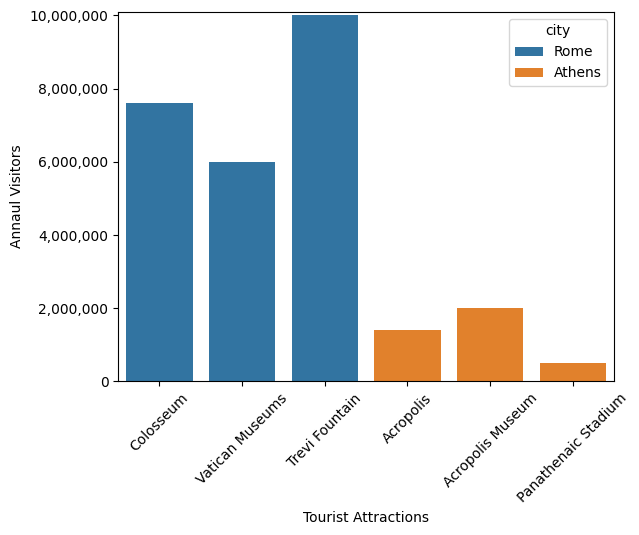

In [61]:
ax = sns.barplot(data=merged_df, x='attraction', y='annual_visitors', hue='city')
ax.set_ylim(0, merged_df['annual_visitors'].max() + 100000)  
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  
plt.xticks(rotation=45)  
plt.xlabel('Tourist Attractions')
plt.ylabel('Annaul Visitors')
plt.show()